In 2011, URL shortening service Bitly partnered with the US government website
USA.gov to provide a feed of anonymous data gathered from users who shorten links
ending with .gov or .mil. In 2011, a live feed as well as hourly snapshots were available
as downloadable text files.


In the case of the hourly snapshots, each line in each file contains a common form of
web data known as JSON, which stands for JavaScript Object Notation.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading data</a></span></li><li><span><a href="#Counting-Time-Zones-in-Pure-Python" data-toc-modified-id="Counting-Time-Zones-in-Pure-Python-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Counting Time Zones in Pure Python</a></span></li><li><span><a href="#Counting-Time-Zones-with-pandas" data-toc-modified-id="Counting-Time-Zones-with-pandas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Counting Time Zones with pandas</a></span></li><li><span><a href="#Extracting-information" data-toc-modified-id="Extracting-information-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extracting information</a></span><ul class="toc-item"><li><span><a href="#Parsing-textual-information" data-toc-modified-id="Parsing-textual-information-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Parsing textual information</a></span></li><li><span><a href="#categorising-users-to-windows-and-non-windows" data-toc-modified-id="categorising-users-to-windows-and-non-windows-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>categorising users to windows and non windows</a></span></li></ul></li></ul></div>

In [1]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

# Reading data

In [2]:
path = r"./bitly_usagov/example.txt"

In [3]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json

records = [json.loads(line) for line in open(path)]

In [5]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

# Counting Time Zones in Pure Python

In [6]:
# time_zones = [rec['tz'] for rec in records if "tz" in rec]
time_zones = []
for rec in records:
    if "tz" in rec:
        if len(rec['tz']) >= 1:
            time_zones.append(rec['tz'])

In [7]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York']

In [8]:
# time_zones = [rec['tz'] for rec in records if "tz" in rec]
# time_zones[:10]

In [9]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [10]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [11]:
from collections import Counter

get_counts3 = lambda x: Counter(x)

In [12]:
counts = get_counts3(time_zones)
print(counts['America/New_York'])
print(len(time_zones))

1251
2919


In [13]:
counts.most_common(10) # using Counter


# def top_counts(count_dict, n=10):
#     value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
#     value_key_pairs.sort()
#     return value_key_pairs[-n:]


[('America/New_York', 1251),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33),
 ('Europe/Berlin', 28)]

# Counting Time Zones with pandas

In [14]:
frame = pd.DataFrame(records)

In [15]:
frame.columns

Index(['a', 'c', 'nk', 'tz', 'gr', 'g', 'h', 'l', 'al', 'hh', 'r', 'u', 't',
       'hc', 'cy', 'll', '_heartbeat_', 'kw'],
      dtype='object')

In [16]:
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [17]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [18]:
frame.isnull().sum()

a               120
c               641
nk              120
tz              120
gr              641
g               120
h               120
l               120
al              466
hh              120
r               120
u               120
t               120
hc              120
cy              641
ll              641
_heartbeat_    3440
kw             3467
dtype: int64

In [19]:
len(frame)

3560

In [20]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [21]:
tz_counts = frame['tz'].value_counts()

In [22]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [23]:
len(tz_counts)

97

Text(0.5, 1.0, 'Top TimeZones')

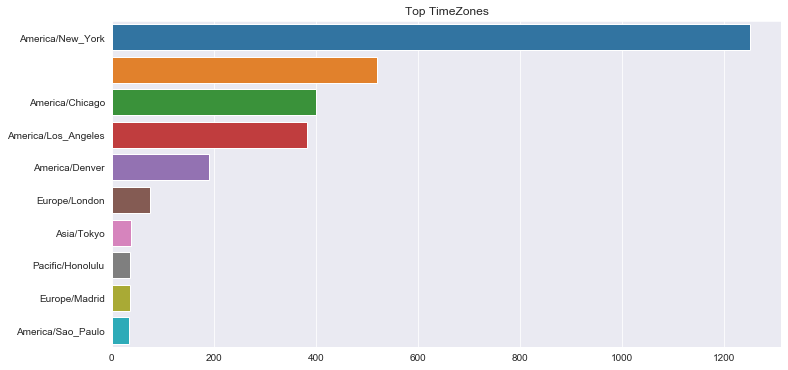

In [24]:
# plotting using seaborn

plt.figure(figsize=(12, 6))
subset = tz_counts[:10]
s = sns.barplot(y=subset.index, x=subset.values)
plt.title("Top TimeZones")

# Extracting information

The **a** field contains information about the browser, device, or application used to
perform the URL shortening

In [25]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [26]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [27]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

## Parsing textual information

Parsing all of the interesting information in these “agent” strings may seem like a daunting task. One possible strategy is to split off the first token in the string (corresponding roughly to the browser capability) and make another summary of the user behavior

In [28]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [29]:
results.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
BlackBerry8520/5.0.0.592                                3
Dalvik/1.4.0                                            3
Socialite/7766                                          2
BlackBerry9630/5.0.0.975                                2
Acoon                                                   2
Goldfire                                                2
Opera/9.30                                              1
Vodafone/1.0/LG-KU990i/V10c                             1
Opera/9.50                                              1
BlackBerry9300

## categorising users to windows and non windows

In [30]:
cframe = frame[frame.a.notnull()]
frame.columns

Index(['a', 'c', 'nk', 'tz', 'gr', 'g', 'h', 'l', 'al', 'hh', 'r', 'u', 't',
       'hc', 'cy', 'll', '_heartbeat_', 'kw'],
      dtype='object')

In [31]:
len(cframe)

3440

In [32]:
cframe = frame[frame.a.notnull()]

values = np.where(cframe['a'].str.contains("Windows"), 
                      "Windows", "Not Windows")
cframe.insert(len(cframe.columns), "os", values) 

In [33]:
cframe.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows


In [34]:
cframe.loc[cframe.tz == " "]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os


In [35]:
# cframe = frame[frame.a.notnull()]

# values = np.where(cframe['a'].str.contains("Windows"), 
#                       "Windows", "Not Windows")
# cframe = cframe.assign(os = values)
# cframe.head()

In [36]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [37]:
# https://www.geeksforgeeks.org/reshape-a-pandas-dataframe-using-stackunstack-and-melt-method/

by_tz_os = cframe.groupby(['tz', 'os'])

In [38]:
temp = by_tz_os.size()
temp[:10]

tz                              os         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
dtype: int64

In [39]:
temp.loc["America/Anchorage"]

os
Not Windows    4
Windows        1
dtype: int64

In [40]:
agg_counts = by_tz_os.size().unstack()
agg_counts = agg_counts.drop("", axis=0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
Africa/Cairo,NaN,3.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,NaN,2.0
Africa/Johannesburg,NaN,1.0
Africa/Lusaka,NaN,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,NaN
America/Argentina/Cordoba,NaN,1.0
America/Argentina/Mendoza,NaN,1.0


In [41]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts = agg_counts.drop("", axis=0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0
America/Argentina/Mendoza,0.0,1.0


In [42]:
len(agg_counts)

96

top overall time zones. To do so, construct an indirect index
array from the row counts in agg_counts

In [43]:
# https://www.youtube.com/watch?v=6W8UHvn8ckg


np.array([5, 4, 1, 2]).argsort()

array([2, 3, 1, 0], dtype=int64)

In [44]:
# Use to sort in ascending order
indexer = agg_counts.sum(1)

indexer = np.array([round(i, 2) for i in indexer.values], dtype=int)
print(list(indexer))
print()
print(list(indexer[[75, 36, 35, 54, 33, 55, 56, 59, 61, 26, 25, 23, 51, 20, 53, 19, 52,
        1, 86, 13,  3,  4, 88, 10, 91, 85,  8,  7,  6,  2, 32, 16, 39, 12,
       78, 83, 90, 65, 50,  0, 72, 49, 67, 48, 47, 22, 44,  9, 69, 68, 38,
       17, 41, 93, 43, 71, 57, 70,  5, 89, 60, 40, 64, 15, 62, 74, 27, 42,
       46, 82, 80, 79, 73, 45, 30, 94, 37, 81, 87, 24, 92, 18, 29, 63, 31,
       84, 66, 34, 77, 95, 58, 76, 14, 21, 11, 28]]))

[3, 1, 2, 1, 1, 5, 1, 1, 1, 3, 1, 400, 2, 1, 191, 6, 2, 4, 20, 1, 1, 382, 3, 1, 15, 1, 1, 9, 1251, 20, 10, 25, 2, 1, 33, 1, 1, 12, 4, 2, 6, 4, 9, 4, 3, 10, 9, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 5, 37, 1, 6, 1, 6, 22, 6, 2, 28, 3, 4, 4, 5, 5, 3, 10, 8, 1, 74, 35, 2, 10, 10, 14, 10, 2, 27, 1, 1, 14, 1, 6, 2, 1, 16, 4, 11, 36]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 8, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 12, 14, 14, 15, 16, 20, 20, 22, 25, 27, 28, 33, 35, 36, 37, 74, 191, 382, 400, 1251]


In [45]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer.values

array([75, 36, 35, 54, 33, 55, 56, 59, 61, 26, 25, 23, 51, 20, 53, 19, 52,
        1, 86, 13,  3,  4, 88, 10, 91, 85,  8,  7,  6,  2, 32, 16, 39, 12,
       78, 83, 90, 65, 50,  0, 72, 49, 67, 48, 47, 22, 44,  9, 69, 68, 38,
       17, 41, 93, 43, 71, 57, 70,  5, 89, 60, 40, 64, 15, 62, 74, 27, 42,
       46, 82, 80, 79, 73, 45, 30, 94, 37, 81, 87, 24, 92, 18, 29, 63, 31,
       84, 66, 34, 77, 95, 58, 76, 14, 21, 11, 28], dtype=int64)

In [46]:
indexer[-10:].values

array([66, 34, 77, 95, 58, 76, 14, 21, 11, 28], dtype=int64)

In [47]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
Europe/Berlin,9.0,19.0
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0


In [48]:
# same effect 
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
Europe/Berlin            28.0
dtype: float64

In [49]:
# plotting a stacked barplot

count_subset = count_subset.stack()
count_subset.name = 'total'

In [50]:
count_subset

tz                   os         
Europe/Berlin        Not Windows      9.0
                     Windows         19.0
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
America/New_York     Not Windows    339.0
                     Windows        912.0
Name: total, dtype: float64

In [51]:
count_subset.index

MultiIndex([(      'Europe/Berlin', 'Not Windows'),
            (      'Europe/Berlin',     'Windows'),
            (  'America/Sao_Paulo', 'Not Windows'),
            (  'America/Sao_Paulo',     'Windows'),
            (      'Europe/Madrid', 'Not Windows'),
            (      'Europe/Madrid',     'Windows'),
            (   'Pacific/Honolulu', 'Not Windows'),
            (   'Pacific/Honolulu',     'Windows'),
            (         'Asia/Tokyo', 'Not Windows'),
            (         'Asia/Tokyo',     'Windows'),
            (      'Europe/London', 'Not Windows'),
            (      'Europe/London',     'Windows'),
            (     'America/Denver', 'Not Windows'),
            (     'America/Denver',     'Windows'),
            ('America/Los_Angeles', 'Not Windows'),
            ('America/Los_Angeles',     'Windows'),
            (    'America/Chicago', 'Not Windows'),
            (    'America/Chicago',     'Windows'),
            (   'America/New_York', 'Not Windows'),
            

In [52]:
count_subset = count_subset.reset_index()
count_subset.head()

,tz,os,total
0,Europe/Berlin,Not Windows,9.0
1,Europe/Berlin,Windows,19.0
2,America/Sao_Paulo,Not Windows,13.0
3,America/Sao_Paulo,Windows,20.0
4,Europe/Madrid,Not Windows,16.0


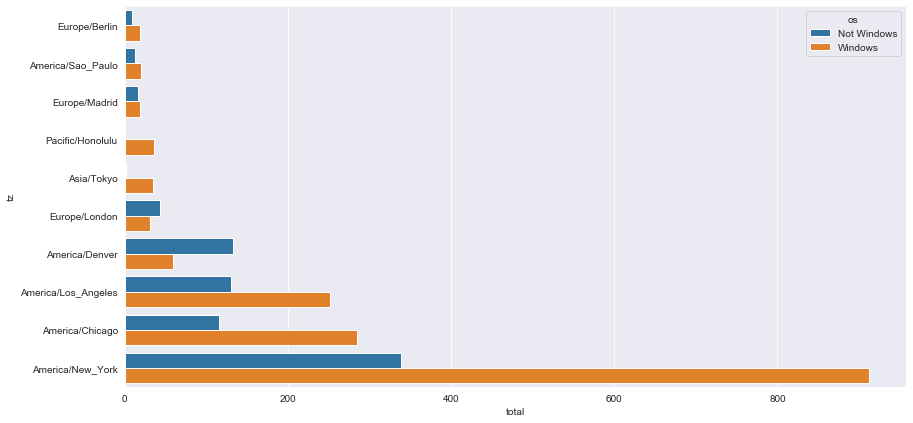

In [53]:
plt.figure(figsize=(14, 7))

g = sns.barplot(x="total", y="tz", hue="os", data=count_subset)

In [54]:
# normalizing values

def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

In [55]:
list(count_subset.groupby("tz"))

[('America/Chicago',
                   tz           os  total
  16  America/Chicago  Not Windows  115.0
  17  America/Chicago      Windows  285.0),
 ('America/Denver',
                  tz           os  total
  12  America/Denver  Not Windows  132.0
  13  America/Denver      Windows   59.0),
 ('America/Los_Angeles',
                       tz           os  total
  14  America/Los_Angeles  Not Windows  130.0
  15  America/Los_Angeles      Windows  252.0),
 ('America/New_York',
                    tz           os  total
  18  America/New_York  Not Windows  339.0
  19  America/New_York      Windows  912.0),
 ('America/Sao_Paulo',
                    tz           os  total
  2  America/Sao_Paulo  Not Windows   13.0
  3  America/Sao_Paulo      Windows   20.0),
 ('Asia/Tokyo',
             tz           os  total
  8  Asia/Tokyo  Not Windows    2.0
  9  Asia/Tokyo      Windows   35.0),
 ('Europe/Berlin',
                tz           os  total
  0  Europe/Berlin  Not Windows    9.0
  1  Europe

In [56]:
results = count_subset.groupby('tz').apply(norm_total)

In [57]:
results

,tz,os,total,normed_total
0,Europe/Berlin,Not Windows,9.0,0.321429
1,Europe/Berlin,Windows,19.0,0.678571
2,America/Sao_Paulo,Not Windows,13.0,0.393939
3,America/Sao_Paulo,Windows,20.0,0.606061
4,Europe/Madrid,Not Windows,16.0,0.457143
5,Europe/Madrid,Windows,19.0,0.542857
6,Pacific/Honolulu,Not Windows,0.0,0.000000
7,Pacific/Honolulu,Windows,36.0,1.000000
8,Asia/Tokyo,Not Windows,2.0,0.054054
9,Asia/Tokyo,Windows,35.0,0.945946


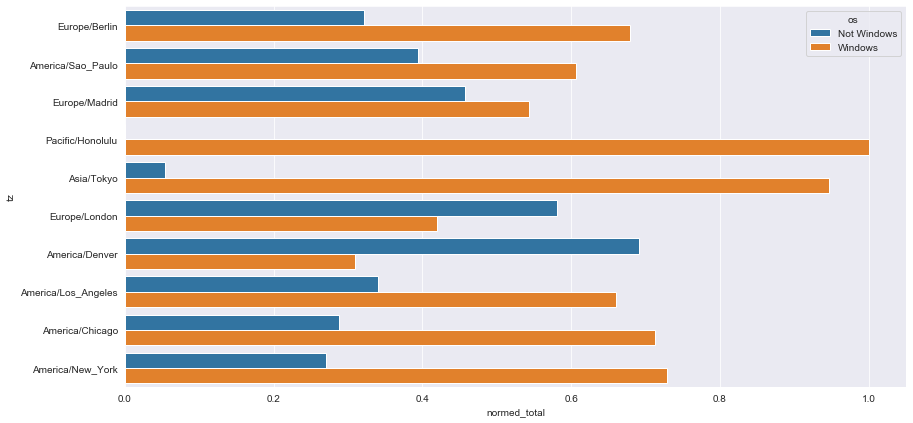

In [58]:
plt.figure(figsize=(14, 7))

g = sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [59]:
# more efficient way

g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

In [60]:
count_subset["normed_total"] = count_subset.total / g.total.transform('sum')

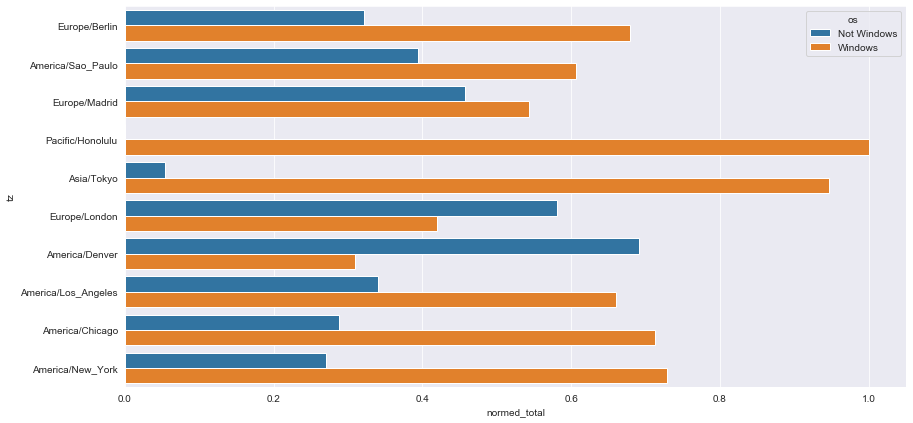

In [61]:
plt.figure(figsize=(14, 7))

g = sns.barplot(x='normed_total', y='tz', hue='os', data=count_subset)